In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load and preprocess data
path = os.listdir(r'C:\Users\WELCOME\Documents\brain_tumor\Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [3]:
X = []
Y = []

for cls in classes:
    pth = r'C:\Users\WELCOME\Documents\brain_tumor\Training' + '\\' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '\\' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
# Data splitting
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.20)

In [6]:
# Feature scaling
xtrain = xtrain / 255
xtest = xtest / 255

In [7]:
# Logistic Regression
print("Training Logistic Regression...")
lg = LogisticRegression(C=0.1)
lg.fit(xtrain.reshape(-1, 200*200), ytrain)

lg_train_score = lg.score(xtrain.reshape(-1, 200*200), ytrain)
lg_test_score = lg.score(xtest.reshape(-1, 200*200), ytest)
print("Logistic Regression Training Score:", lg_train_score)
print("Logistic Regression Testing Score:", lg_test_score)

Training Logistic Regression...
Logistic Regression Training Score: 1.0
Logistic Regression Testing Score: 0.9591836734693877


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Support Vector Classifier
print("\nTraining Support Vector Classifier...")
sv = SVC()
sv.fit(xtrain.reshape(-1, 200*200), ytrain)

sv_train_score = sv.score(xtrain.reshape(-1, 200*200), ytrain)
sv_test_score = sv.score(xtest.reshape(-1, 200*200), ytest)

print("Support Vector Classifier Training Score:", sv_train_score)
print("Support Vector Classifier Testing Score:", sv_test_score)


Training Support Vector Classifier...
Support Vector Classifier Training Score: 0.9938587512794268
Support Vector Classifier Testing Score: 0.963265306122449


In [9]:
# CNN Model
print("\nTraining Convolutional Neural Network (CNN)...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
model.fit(xtrain.reshape(-1, 200, 200, 1), ytrain, epochs=10, validation_data=(xtest.reshape(-1, 200, 200, 1), ytest))


Training Convolutional Neural Network (CNN)...
Epoch 1/10
31/31 [==============================] - 45s 1s/step - loss: 0.4458 - accuracy: 0.7902 - val_loss: 0.1495 - val_accuracy: 0.9469
Epoch 2/10
31/31 [==============================] - 43s 1s/step - loss: 0.1718 - accuracy: 0.9396 - val_loss: 0.1194 - val_accuracy: 0.9633
Epoch 3/10
31/31 [==============================] - 43s 1s/step - loss: 0.0738 - accuracy: 0.9785 - val_loss: 0.0795 - val_accuracy: 0.9673
Epoch 4/10
31/31 [==============================] - 43s 1s/step - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0795 - val_accuracy: 0.9755
Epoch 5/10
31/31 [==============================] - 45s 1s/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0742 - val_accuracy: 0.9837
Epoch 6/10
31/31 [==============================] - 44s 1s/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0570 - val_accuracy: 0.9796
Epoch 7/10
31/31 [==============================] - 44s 1s/step - loss: 5.4488e-04 - accuracy: 1.0000 - val_loss

In [10]:
# Evaluation
cnn_test_loss, cnn_test_acc = model.evaluate(xtest.reshape(-1, 200, 200, 1), ytest, verbose=2)
print("\nConvolutional Neural Network (CNN) Testing Accuracy:", cnn_test_acc)

8/8 - 3s - loss: 0.0754 - accuracy: 0.9837 - 3s/epoch - 338ms/step

Convolutional Neural Network (CNN) Testing Accuracy: 0.9836734533309937


In [11]:
# Compare model accuracies
print("\nModel Accuracy Comparison:")
print("Logistic Regression Testing Accuracy:", lg_test_score)
print("Support Vector Classifier Testing Accuracy:", sv_test_score)
print("Convolutional Neural Network (CNN) Testing Accuracy:", cnn_test_acc)


Model Accuracy Comparison:
Logistic Regression Testing Accuracy: 0.9591836734693877
Support Vector Classifier Testing Accuracy: 0.963265306122449
Convolutional Neural Network (CNN) Testing Accuracy: 0.9836734533309937


In [12]:
# Visualize output (e.g., confusion matrix)
lg_pred = lg.predict(xtest.reshape(-1, 200*200))
sv_pred = sv.predict(xtest.reshape(-1, 200*200))
cnn_pred = np.argmax(model.predict(xtest.reshape(-1, 200, 200, 1)), axis=1)

8/8 [==============================] - 3s 340ms/step


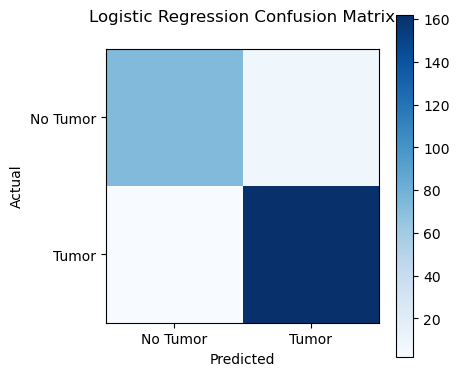

In [13]:
# Confusion matrix for Logistic Regression
plt.figure(figsize=(12, 6))  # Increase the figure width to accommodate the color bar
plt.subplot(131)
cm = confusion_matrix(ytest, lg_pred)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Logistic Regression Confusion Matrix', pad=20)  # Add some padding to the title
plt.colorbar(shrink=0.6)  # Adjust the shrink parameter to change the color bar size
plt.xticks([0, 1], ['No Tumor', 'Tumor'])
plt.yticks([0, 1], ['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


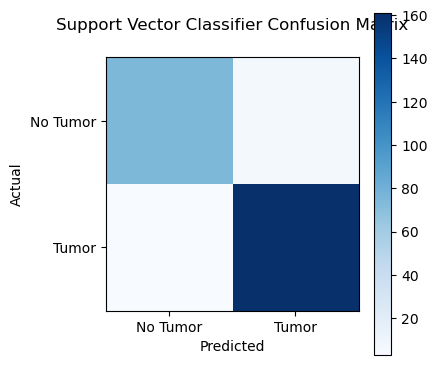

In [14]:
# Confusion matrix for Support Vector Classifier
plt.figure(figsize=(12, 6))  # Increase the figure width to accommodate the color bar
plt.subplot(132)
cm = confusion_matrix(ytest, sv_pred)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Support Vector Classifier Confusion Matrix', pad=20)  # Add padding to the title
plt.colorbar(shrink=0.6)  # Adjust the shrink parameter for color bar size
plt.xticks([0, 1], ['No Tumor', 'Tumor'])
plt.yticks([0, 1], ['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


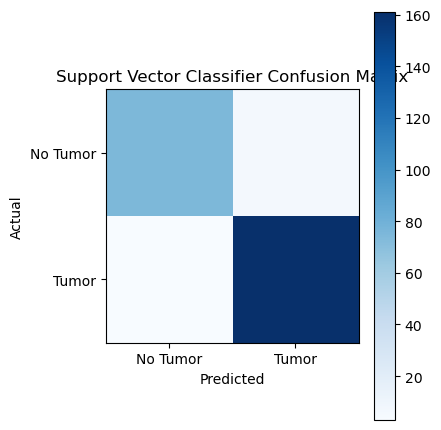

In [15]:
# Confusion matrix for Support Vector Classifier
plt.figure(figsize=(12, 6))
ax = plt.subplot(132)
cm = confusion_matrix(ytest, sv_pred)
im = ax.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Support Vector Classifier Confusion Matrix')
plt.colorbar(im, ax=ax, shrink=0.8)  # Adjust the shrink parameter for the color bar size
plt.xticks([0, 1], ['No Tumor', 'Tumor'])
plt.yticks([0, 1], ['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the rect parameter for subplot positioning
plt.show()


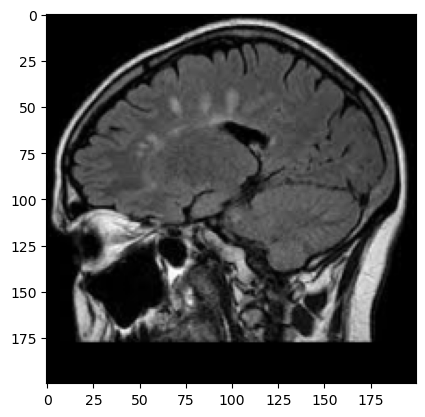

In [16]:
plt.imshow(X[8], cmap = 'gray')
plt.show()

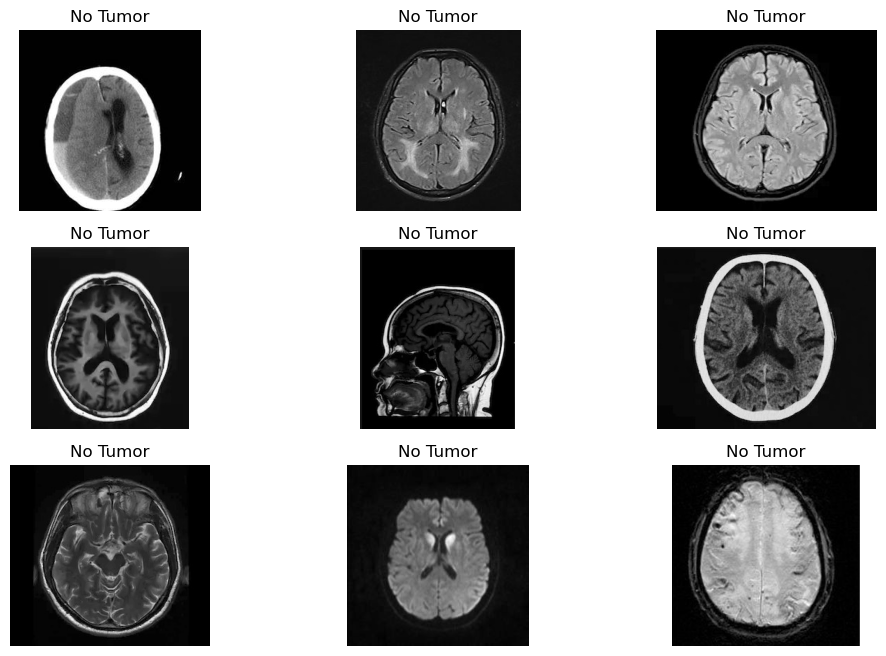

In [18]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}
plt.figure(figsize=(12, 8))
p = os.listdir('C:/Users/WELCOME/Documents/brain_tumor/Testing/')
c = 1
for i in os.listdir('C:/Users/WELCOME/Document/brain_tumor/Testing//no_tumor/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('C:/Users/WELCOME/Documents/brain_tumor/Testing/no_tumor/'+i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()

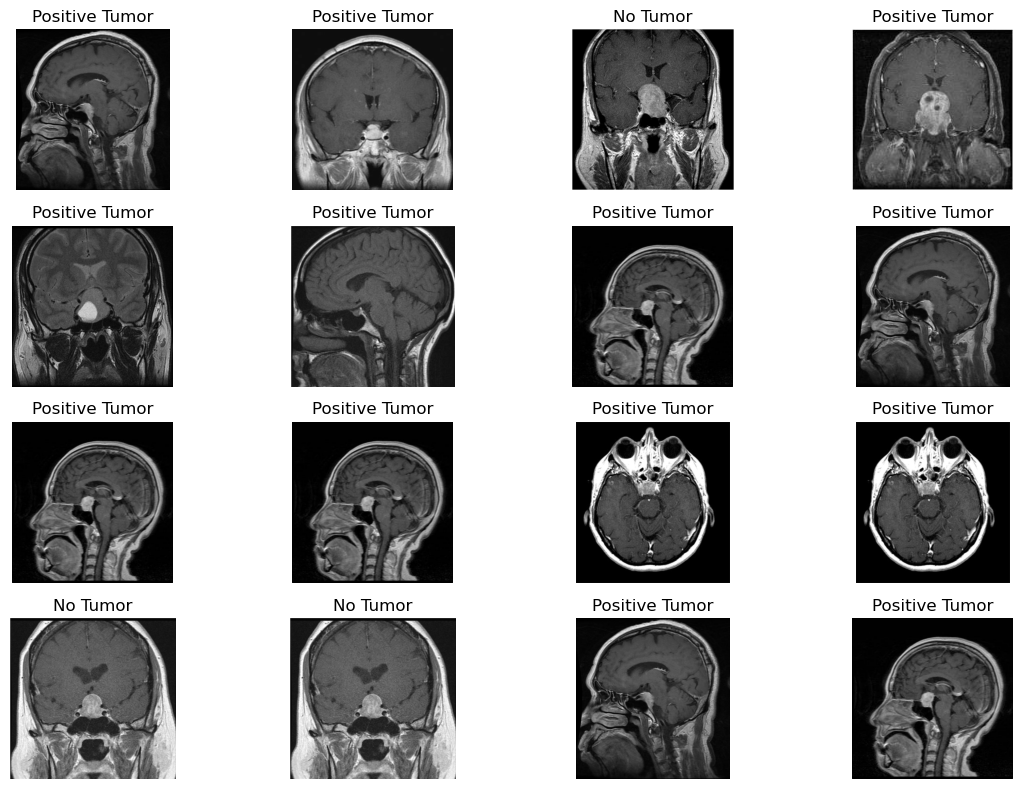

In [32]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}
plt.figure(figsize=(12, 8))

# Use raw string literals or replace backslashes with forward slashes
p = os.listdir(r'C:/Users/WELCOME/Documents/brain_tumor/Testing/')
c = 1

# Change the grid to accommodate 16 subplots (4x4)
for i in os.listdir(r'C:/Users/WELCOME/Documents/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4, 4, c)
    img = cv2.imread(r'C:/Users/WELCOME/Documents/brain_tumor/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    
    # Assuming 'sv' is your trained Support Vector Classifier
    p = sv.predict(img1)
    
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


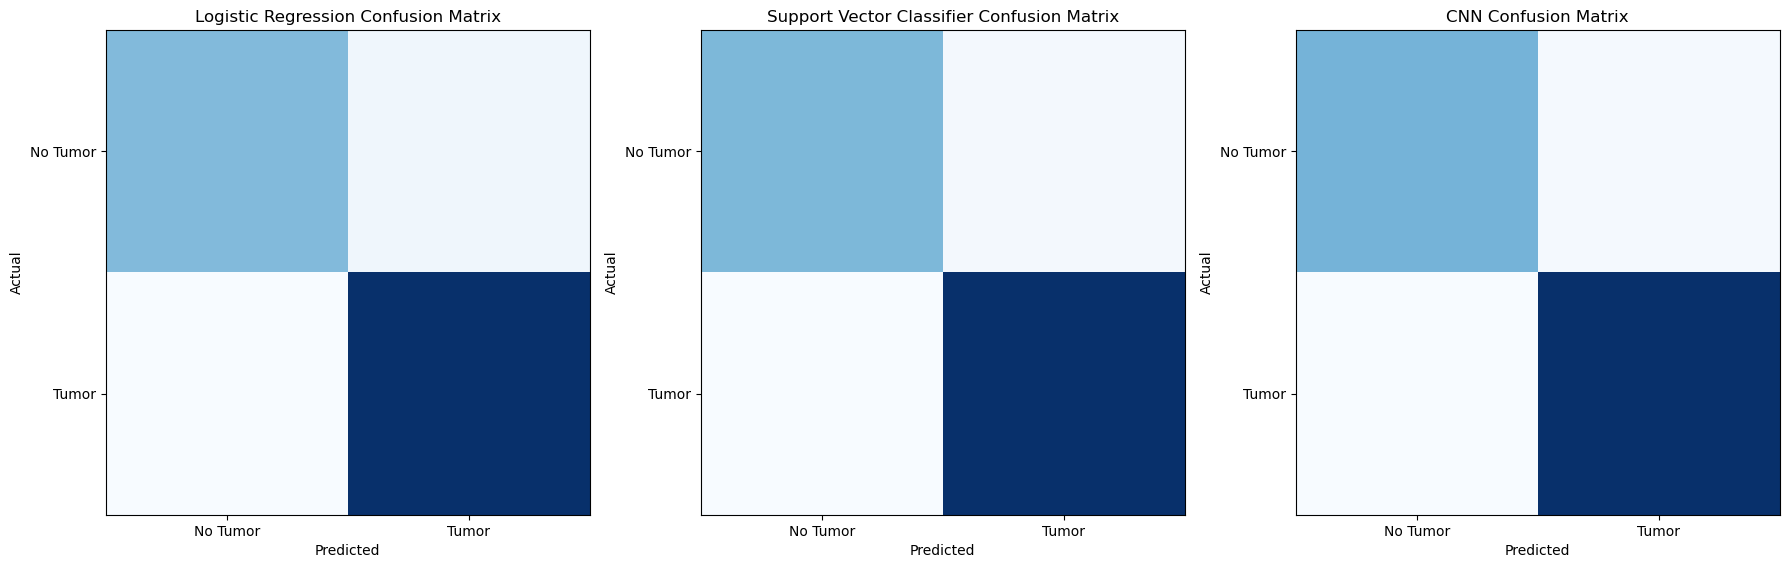

In [20]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for Logistic Regression
cm = confusion_matrix(ytest, lg_pred)
axes[0].imshow(cm, cmap='Blues', interpolation='nearest')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['No Tumor', 'Tumor'])
axes[0].set_yticklabels(['No Tumor', 'Tumor'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Support Vector Classifier
cm = confusion_matrix(ytest, sv_pred)
axes[1].imshow(cm, cmap='Blues', interpolation='nearest')
axes[1].set_title('Support Vector Classifier Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['No Tumor', 'Tumor'])
axes[1].set_yticklabels(['No Tumor', 'Tumor'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion matrix for CNN
cm = confusion_matrix(ytest, cnn_pred)
axes[2].imshow(cm, cmap='Blues', interpolation='nearest')
axes[2].set_title('CNN Confusion Matrix')
axes[2].set_xticks([0, 1])
axes[2].set_yticks([0, 1])
axes[2].set_xticklabels(['No Tumor', 'Tumor'])
axes[2].set_yticklabels(['No Tumor', 'Tumor'])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


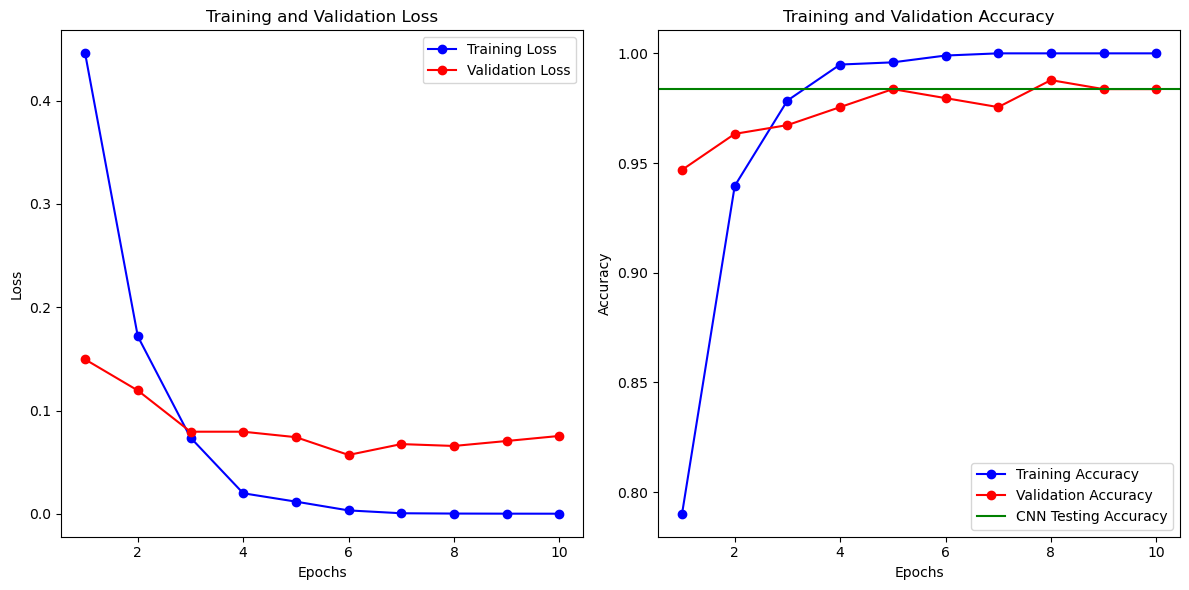

In [22]:
import matplotlib.pyplot as plt

# Training and validation loss values
loss_values = [0.4458, 0.1718, 0.0738, 0.0199, 0.0118, 0.0033, 5.4488e-04, 2.4641e-04, 1.4694e-04, 1.1015e-04]
val_loss_values = [0.1495, 0.1194, 0.0795, 0.0795, 0.0742, 0.0570, 0.0675, 0.0657, 0.0705, 0.0754]

# Training and validation accuracy values
accuracy_values = [0.7902, 0.9396, 0.9785, 0.9949, 0.9959, 0.9990, 1.0000, 1.0000, 1.0000, 1.0000]
val_accuracy_values = [0.9469, 0.9633, 0.9673, 0.9755, 0.9837, 0.9796, 0.9755, 0.9878, 0.9837, 0.9837]

# Epochs
epochs = range(1, 11)

# Plot loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'ro-', label='Validation Accuracy')
plt.axhline(y=0.9837, color='g', linestyle='-', label='CNN Testing Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
